# Perfect Plots: Individuals Control Chart  I-MR

## Energy
Source of data: https://github.com/pyviz/holoviews/blob/master/examples/assets/energy.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('c:/2/Energy.csv')
df.head()

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN
3,3,2006-01-04,1457.217,NaN,NaN,NaN
4,4,2006-01-05,1477.131,NaN,NaN,NaN


In [3]:
DDT = df[['Date','Consumption']]
print(DDT.head())

         Date  Consumption
0  2006-01-01     1069.184
1  2006-01-02     1380.521
2  2006-01-03     1442.533
3  2006-01-04     1457.217
4  2006-01-05     1477.131


### <span style="color:blue">Moving Range (R) Stretch marks means differences between the values of subsequent quotations</span>


In [4]:
DDT['Cons_diff'] = DDT['Consumption'].diff()  # rozstępy między pomiarami
DDT['Cons_diff'] = abs(DDT['Cons_diff'])   # wartość bezwzględna dla liczby

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
DDT.head()

,Date,Consumption,Cons_diff
0,2006-01-01,1069.184,NaN
1,2006-01-02,1380.521,311.337
2,2006-01-03,1442.533,62.012
3,2006-01-04,1457.217,14.684
4,2006-01-05,1477.131,19.914


### <span style="color:blue">The average moving range and the average of the last 200 measurements</span>

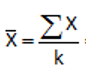    

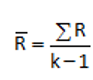

In [6]:
X_men = DDT['Consumption'].tail(200).mean(axis=0)
X_men

1362.0095919500009

In [7]:
R_men = DDT['Cons_diff'].tail(200).mean(axis=0)
R_men

100.07229509999998

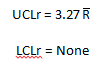

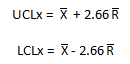

In [8]:
DDT['X_men'] = DDT['Consumption'].tail(200).mean(axis=0)
DDT['R_men'] = DDT['Cons_diff'].tail(200).mean(axis=0)
DDT['UCLr'] = 3.27 * DDT['R_men']
DDT['UCLx'] = DDT['X_men'] + (2.66*DDT['R_men'])
DDT['LCLx'] = DDT['X_men'] - (2.66*DDT['R_men'])
DDT.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Consumption,Cons_diff,X_men,R_men,UCLr,UCLx,LCLx
0,2006-01-01,1069.184,NaN,1362.009592,100.072295,327.236405,1628.201897,1095.817287
1,2006-01-02,1380.521,311.337,1362.009592,100.072295,327.236405,1628.201897,1095.817287
2,2006-01-03,1442.533,62.012,1362.009592,100.072295,327.236405,1628.201897,1095.817287
3,2006-01-04,1457.217,14.684,1362.009592,100.072295,327.236405,1628.201897,1095.817287
4,2006-01-05,1477.131,19.914,1362.009592,100.072295,327.236405,1628.201897,1095.817287


### Standard deviation for the process
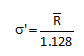

In [9]:
DDT['std_T'] = DDT['R_men']/1.128
DDT.tail(2)

,Date,Consumption,Cons_diff,X_men,R_men,UCLr,UCLx,LCLx,std_T
4381,2017-12-30,1215.44897,79.63856,1362.009592,100.072295,327.236405,1628.201897,1095.817287,88.716574
4382,2017-12-31,1107.11488,108.33409,1362.009592,100.072295,327.236405,1628.201897,1095.817287,88.716574


### Last 30 measurements

In [10]:
ZZT = DDT.tail(60)

In [11]:
ZZT['Date'] = pd.to_datetime(ZZT['Date'])
ZZT.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Date           datetime64[ns]
Consumption           float64
Cons_diff             float64
X_men                 float64
R_men                 float64
UCLr                  float64
UCLx                  float64
LCLx                  float64
std_T                 float64
dtype: object

### Individuals Control Chart I-MR

No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


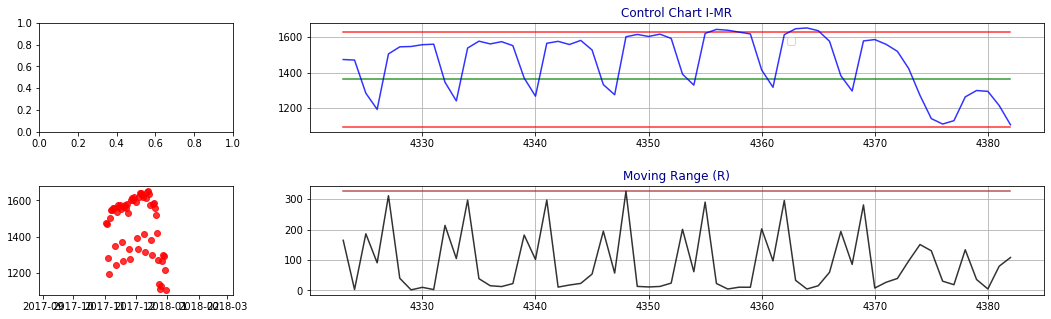

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4,figsize=(18, 8))

grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.5)
ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1:])
ax3 = plt.subplot(grid[1, :1])
ax4 = plt.subplot(grid[1, 1:])


#ax1.plot(ZZT['Consumption'],color='green', alpha=0.8)
#ax1.set_title('Freedom in the world', color='darkblue')
#ax1.set_xlabel('jakaś zmienna')
#ax1.set_ylabel('ogólnie wykres bez sensu', color='brown')

ax2.set_title('Control Chart I-MR', color='darkblue')
ax2.plot(ZZT['X_men'],color='green', alpha=0.8)
ax2.plot(ZZT['UCLx'],color='red', alpha=0.8)
ax2.plot(ZZT['LCLx'],color='red', alpha=0.8)
ax2.plot(ZZT['Consumption'],color='blue', alpha=0.8)
ax2.legend(loc=(0.65, 0.8))
ax2.grid()

#ax3.scatter(ZZT['couns_a_diff'],df['Freedom'],color='blue', alpha=0.8)
ax3.scatter(ZZT['Date'],ZZT['Consumption'],color='red', alpha=0.8)
#ax3.legend(loc=(0.65, 0.8))

ax4.set_title('Moving Range (R)', color='darkblue')
ax4.plot(ZZT['UCLr'],color='brown', alpha=0.8)
ax4.plot( ZZT['Cons_diff'], color='black', alpha=0.8)
ax4.grid()

## Individuals Control Chart I-MR


Source of data: https://www.spcforexcel.com/knowledge/variable-control-charts/individuals-control-charts

In [13]:
dk = pd.read_csv('c:/11/ABC.txt')
dk

,nr,point
0,1,3.5
1,2,2.4
2,3,4.1
3,4,2.8
4,5,3.0
5,6,4.7
6,7,1.2
7,8,0.9
8,9,2.5
9,10,3.1


### <span style="color:blue">Moving Range (R)</span>

In [14]:
dk['point_diff'] = dk['point'].diff()  # rozstępy między pomiarami
dk['point_diff'] = abs(dk['point_diff'])   # wartość bezwzględna dla liczby

### <span style="color:blue">Mean and Range (R)</span>

In [15]:
dk['X_men'] = dk['point'].tail(200).mean(axis=0)
dk['R_men'] = dk['point_diff'].tail(200).mean(axis=0)
dk['UCLr'] = 3.27 * dk['R_men']
dk['UCLx'] = dk['X_men'] + (2.66*dk['R_men'])
dk['LCLx'] = dk['X_men'] - (2.66*dk['R_men'])
dk.head()

,nr,point,point_diff,X_men,R_men,UCLr,UCLx,LCLx
0,1,3.5,NaN,3.166667,1.191304,3.895565,6.335536,-0.002203
1,2,2.4,1.1,3.166667,1.191304,3.895565,6.335536,-0.002203
2,3,4.1,1.7,3.166667,1.191304,3.895565,6.335536,-0.002203
3,4,2.8,1.3,3.166667,1.191304,3.895565,6.335536,-0.002203
4,5,3.0,0.2,3.166667,1.191304,3.895565,6.335536,-0.002203


### <span style="color:blue">Control Chart I-MR</span>

Help: https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html

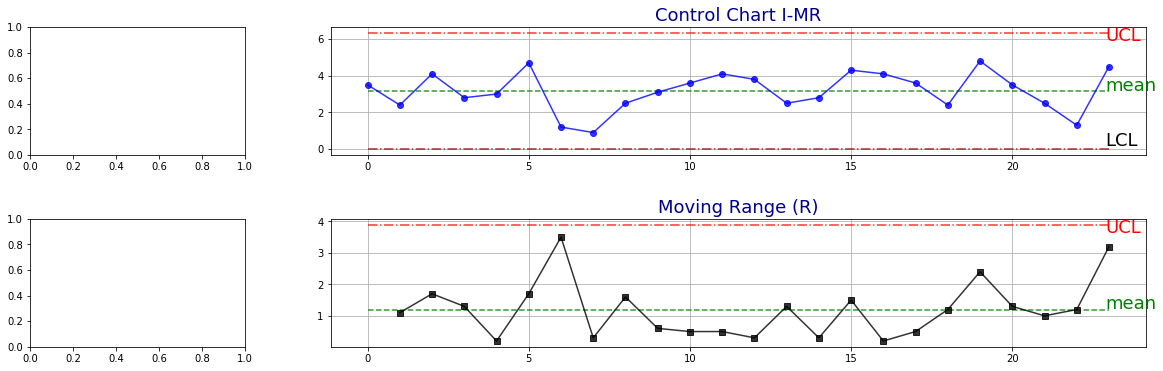

In [16]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4,figsize=(20, 20))

grid = plt.GridSpec(6, 4, wspace=0.4, hspace=0.5)
ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1:])
ax3 = plt.subplot(grid[1, :1])
ax4 = plt.subplot(grid[1, 1:])


#ax1.plot(ZZT['Consumption'],color='green', alpha=0.8)
#ax1.set_title('Freedom in the world', color='darkblue')
#ax1.set_xlabel('jakaś zmienna')
#ax1.set_ylabel('ogólnie wykres bez sensu', color='brown')

ax2.set_title('Control Chart I-MR', color='darkblue', fontsize=18)
ax2.plot(dk['X_men'],'--',color='green', alpha=0.8, label='X_men')
ax2.plot(dk['UCLx'],'-.',color='red', alpha=0.8, label='UCLx')
ax2.plot(dk['LCLx'],'-.',color='darkred', alpha=0.8, label='LCLx')
ax2.plot(dk['point'],'go-',color='blue', alpha=0.8, label='x')
#ax2.legend(loc=(-0.15, 0.5))
ax2.grid()
ax2.annotate('UCL', xy=(1,1), xytext=(0.95, 0.89), textcoords='axes fraction', fontsize=18, color='red')
ax2.annotate('LCL', xy=(1,1), xytext=(0.95, 0.07), textcoords='axes fraction', fontsize=18, color='black')
ax2.annotate('mean', xy=(1,1), xytext=(0.95, 0.5), textcoords='axes fraction', fontsize=18, color='green')


#ax3.scatter(ZZT['couns_a_diff'],df['Freedom'],color='blue', alpha=0.8)
#ax3.scatter(ZZT['Date'],ZZT['Consumption'],color='red', alpha=0.8)
#ax3.legend(loc=(0.65, 0.8))


ax4.set_title('Moving Range (R)', color='darkblue', fontsize=18)
ax4.plot(dk['UCLr'],'-.',color='red',alpha=0.8, label='UCLr')
ax4.plot(dk['R_men'],'--',color='green', alpha=0.8, label='R_men')
ax4.plot( dk['point_diff'],'rs-', color='black', alpha=0.8, label='R')
ax4.annotate('mean', xy=(1,1), xytext=(0.95, 0.3), textcoords='axes fraction', fontsize=18, color='green')
ax4.annotate('UCL', xy=(1,1), xytext=(0.95, 0.89), textcoords='axes fraction', fontsize=18, color='red')
#ax4.legend(loc=(-0.15, 0.6))
ax4.grid()